<font size=6><b> 금리/환률 변화에 따른 주식시장의 변화

In [17]:
from pykrx import stock
from pykrx import bond
import FinanceDataReader as fdr

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')

sns.set() 
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# 금리 변동 데이터
* 9.1.1.3 국제 주요국 중앙은행정책 금리 (한국, 중국, 일본, 미국)
* 2010.01~2023.03 월별 데이터
* ref: https://ecos.bok.or.kr/

In [18]:
interest = pd.read_csv('./국제 주요국 중앙은행 정책금리.csv', thousands=',', date_parser=['변환'])
print(interest.info())
interest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      159 non-null    object 
 1   원자료     159 non-null    float64
 2   원자료.1   159 non-null    float64
 3   원자료.2   119 non-null    float64
 4   원자료.3   159 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB
None


변환   원자료  원자료.1  원자료.2  원자료.3
0  2023/03  3.50   3.65   -0.1  4.875
1  2023/02  3.50   3.65   -0.1  4.625
2  2023/01  3.50   3.65   -0.1  4.375
3  2022/12  3.25   3.65   -0.1  4.375
4  2022/11  3.25   3.65   -0.1  3.875

In [19]:
interest.columns = ['날짜','한국','중국','일본','미국']
interest = interest.set_index('날짜')
interest = interest.sort_index()
interest.tail(80)

한국    중국   일본     미국
날짜                             
2016/08  1.25  4.35  NaN  0.375
2016/09  1.25  4.35 -0.1  0.375
2016/10  1.25  4.35 -0.1  0.375
2016/11  1.25  4.35 -0.1  0.375
2016/12  1.25  4.35 -0.1  0.625
2017/01  1.25  4.35 -0.1  0.625
2017/02  1.25  4.35 -0.1  0.625
2017/03  1.25  4.35 -0.1  0.875
2017/04  1.25  4.35 -0.1  0.875
2017/05  1.25  4.35 -0.1  0.875
2017/06  1.25  4.35 -0.1  1.125
2017/07  1.25  4.35 -0.1  1.125
2017/08  1.25  4.35 -0.1  1.125
2017/09  1.25  4.35 -0.1  1.125
2017/10  1.25  4.35 -0.1  1.125
2017/11  1.50  4.35 -0.1  1.125
2017/12  1.50  4.35 -0.1  1.375
2018/01  1.50  4.35 -0.1  1.375
2018/02  1.50  4.35 -0.1  1.375
2018/03  1.50  4.35 -0.1  1.625
2018/04  1.50  4.35 -0.1  1.625
2018/05  1.50  4.35 -0.1  1.625
2018/06  1.50  4.35 -0.1  1.875
2018/07  1.50  4.35 -0.1  1.875
2018/08  1.50  4.35 -0.1  1.875
2018/09  1.50  4.35 -0.1  2.125
2018/10  1.50  4.35 -0.1  2.125
2018/11  1.75  4.35 -0.1  2.125
2018/12  1.75  4.35 -0.1  2.375
2019/01  1.75  4.35 -0.1  2.375
2019/02  1.75  4.35 -0.1  2.375
2019/03  1.75  4.35 -0.1  2.375
2019/04  1.75  4.35 -0.1  2.375
2019/05  1.75  4.35 -0.1  2.375
2019/06  1.75  4.35 -0.1  2.375
2019/07  1.50  4.35 -0.1  2.375
2019/08  1.50  4.25 -0.1  2.125
2019/09  1.50  4.20 -0.1  1.875
2019/10  1.25  4.20 -0.1  1.625
2019/11  1.25  4.15 -0.1  1.625
2019/12  1.25  4.15 -0.1  1.625
2020/01  1.25  4.15 -0.1  1.625
2020/02  1.25  4.05 -0.1  1.625
2020/03  0.75  4.05 -0.1  0.125
2020/04  0.75  3.85 -0.1  0.125
2020/05  0.50  3.85 -0.1  0.125
2020/06  0.50  3.85 -0.1  0.125
2020/07  0.50  3.85 -0.1  0.125
2020/08  0.50  3.85 -0.1  0.125
2020/09  0.50  3.85 -0.1  0.125
2020/10  0.50  3.85 -0.1  0.125
2020/11  0.50  3.85 -0.1  0.125
2020/12  0.50  3.85 -0.1  0.125
2021/01  0.50  3.85 -0.1  0.125
2021/02  0.50  3.85 -0.1  0.125
2021/03  0.50  3.85 -0.1  0.125
2021/04  0.50  3.85 -0.1  0.125
2021/05  0.50  3.85 -0.1  0.125
2021/06  0.50  3.85 -0.1  0.125
2021/07  0.50  3.85 -0.1  0.125
2021/08  0.75  3.85 -0.1  0.125
2021/09  0.75  3.85 -0.1  0.125
2021/10  0.75  3.85 -0.1  0.125
2021/11  1.00  3.85 -0.1  0.125
2021/12  1.00  3.80 -0.1  0.125
2022/01  1.25  3.70 -0.1  0.125
2022/02  1.25  3.70 -0.1  0.125
2022/03  1.25  3.70 -0.1  0.375
2022/04  1.50  3.70 -0.1  0.375
2022/05  1.75  3.70 -0.1  0.875
2022/06  1.75  3.70 -0.1  1.625
2022/07  2.25  3.70 -0.1  2.375
2022/08  2.50  3.65 -0.1  2.375
2022/09  2.50  3.65 -0.1  3.125
2022/10  3.00  3.65 -0.1  3.125
2022/11  3.25  3.65 -0.1  3.875
2022/12  3.25  3.65 -0.1  4.375
2023/01  3.50  3.65 -0.1  4.375
2023/02  3.50  3.65 -0.1  4.625
2023/03  3.50  3.65 -0.1  4.875

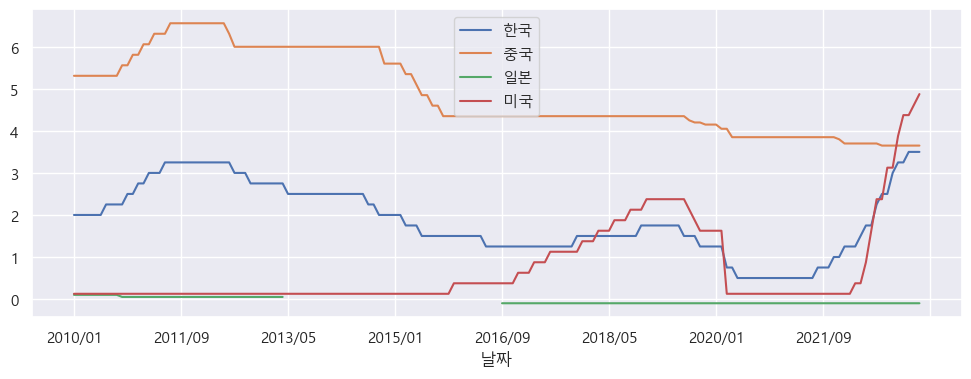

In [20]:
plt.rcParams["figure.figsize"] = (12, 4)
interest.plot()
plt.show()

# 환률 변동 데이터
* 3.1.1.1 주요국 통화의 대원화환율 (원/미국달러)
* 2010.01.02~2023.05.03
* ref: https://ecos.bok.or.kr/

In [21]:
exchange = pd.read_csv('./주요국 통화의 대원화환율.csv', thousands=',',date_parser=['변환'])
print(exchange.info())
exchange.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305 entries, 0 to 3304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      3305 non-null   object 
 1   원자료     3305 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.8+ KB
None


변환     원자료
0  2023/05/03  1340.2
1  2023/05/02  1339.1
2  2023/04/28  1339.9
3  2023/04/27  1337.3
4  2023/04/26  1333.3

In [22]:
exchange.columns = ['날짜','환율']
exchange = exchange.set_index('날짜')
exchange = exchange.sort_index()
exchange.head()

환율
날짜                
2010/01/04  1167.6
2010/01/05  1156.2
2010/01/06  1144.3
2010/01/07  1138.2
2010/01/08  1133.2

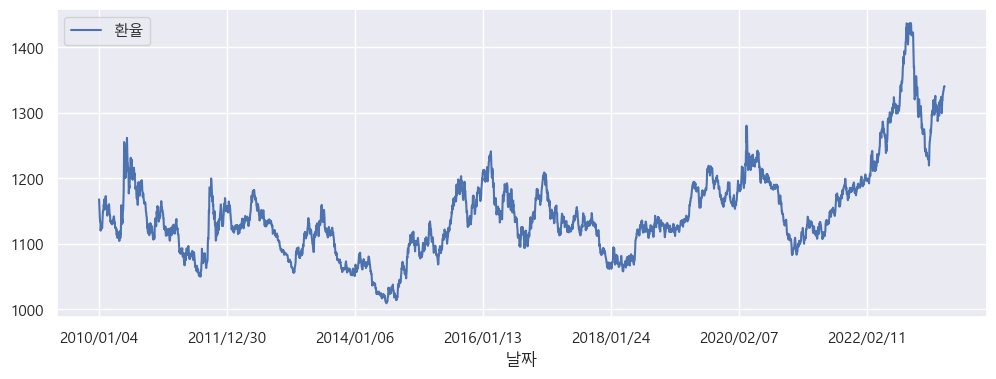

In [23]:
plt.rcParams["figure.figsize"] = (12, 4)
exchange.plot()
plt.show()

# 주가 데이터
* pykrx -- x, 데이터를 불러오는데 시간이 너무 오래 걸림.
* KOSPI, KOSDAQ
    * KRX, 정보데이터 시스템
    * 2010.01.04  ~ 2023.04.24  
    * http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201010101&idxIndMidclssCd=02&money=1
* NASDAQ, S&P500
    * Invest.com
    * 2000.01.01  ~ 2023.05.03  
    * https://www.investing.com/

In [24]:
# KOSPI 시장의 거래대금 조회, 예외처리 필요. 약 13년치 데이터를 로드하는데 시간이 너무 오래걸림.
# kospi = stock.get_market_trading_value_by_date("20100102", "20230430", "KOSPI")

In [25]:
kospi = pd.read_csv('./코스피.csv', encoding='cp949',  thousands=',',date_parser=['일자'])
kospi = kospi.set_index('일자')
kospi = kospi.sort_index()
print(kospi.info())
kospi.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3290 entries, 2010/01/04 to 2023/04/28
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      3290 non-null   float64
 1   대비      3290 non-null   float64
 2   등락률     3290 non-null   float64
 3   시가      3290 non-null   float64
 4   고가      3290 non-null   float64
 5   저가      3290 non-null   float64
 6   거래량     3290 non-null   float64
 7   거래대금    3290 non-null   float64
 8   상장시가총액  3290 non-null   float64
dtypes: float64(9)
memory usage: 257.0+ KB
None


종가     대비   등락률       시가       고가       저가       거래량  \
일자                                                                      
2010/01/04  1696.14  13.37  0.79  1681.71  1696.14  1681.71  296548.0   
2010/01/05  1690.62  -5.52 -0.33  1701.62  1702.39  1686.45  408854.0   
2010/01/06  1705.32  14.70  0.87  1697.88  1706.89  1696.10  426040.0   
2010/01/07  1683.45 -21.87 -1.28  1702.92  1707.90  1683.45  462403.0   
2010/01/08  1695.26  11.81  0.70  1694.06  1695.26  1668.84  379952.0   

                 거래대금       상장시가총액  
일자                                  
2010/01/04  4364596.0  894731591.0  
2010/01/05  6830723.0  891901043.0  
2010/01/06  6391017.0  899645119.0  
2010/01/07  7498405.0  888111374.0  
2010/01/08  6965073.0  894080130.0

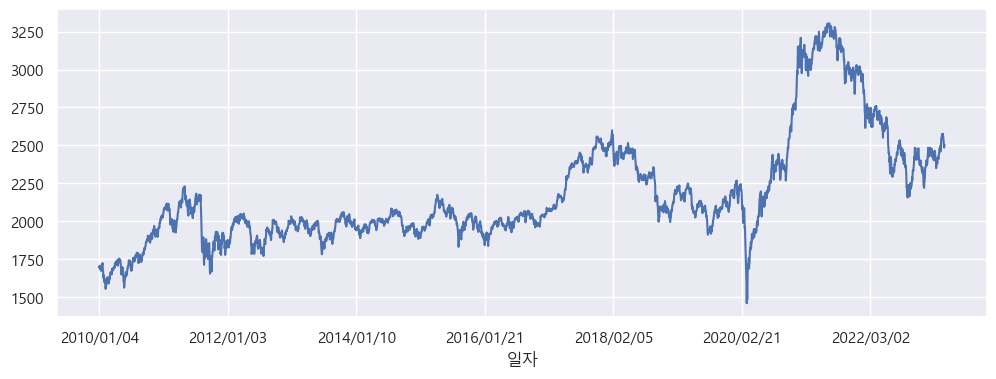

In [26]:
plt.rcParams["figure.figsize"] = (12, 4)
kospi['종가'].plot()
plt.show()

In [27]:
kosdaq = pd.read_csv('./코스닥.csv', encoding='cp949',  thousands=',',date_parser=['일자'])
kosdaq = kosdaq.set_index('일자')
kosdaq = kosdaq.sort_index()
print(kosdaq.info())
kosdaq.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3290 entries, 2010/01/04 to 2023/04/28
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      3290 non-null   float64
 1   대비      3290 non-null   float64
 2   등락률     3290 non-null   float64
 3   시가      3290 non-null   float64
 4   고가      3290 non-null   float64
 5   저가      3290 non-null   float64
 6   거래량     3290 non-null   float64
 7   거래대금    3290 non-null   float64
 8   상장시가총액  3290 non-null   float64
dtypes: float64(9)
memory usage: 257.0+ KB
None


종가     대비   등락률      시가      고가      저가        거래량       거래대금  \
일자                                                                              
2010/01/04  528.09  14.52  2.83  517.03  528.10  517.03   671627.0  2407525.0   
2010/01/05  533.09   5.00  0.95  533.43  536.65  531.06   892544.0  3255666.0   
2010/01/06  539.12   6.03  1.13  537.10  539.13  532.54  1139589.0  3451762.0   
2010/01/07  535.52  -3.60 -0.67  542.88  545.42  534.63  1188189.0  3680332.0   
2010/01/08  538.96   3.44  0.64  539.63  540.29  529.67   898686.0  3005287.0   

                상장시가총액  
일자                      
2010/01/04  88597709.0  
2010/01/05  89502292.0  
2010/01/06  90594197.0  
2010/01/07  90012414.0  
2010/01/08  90619043.0

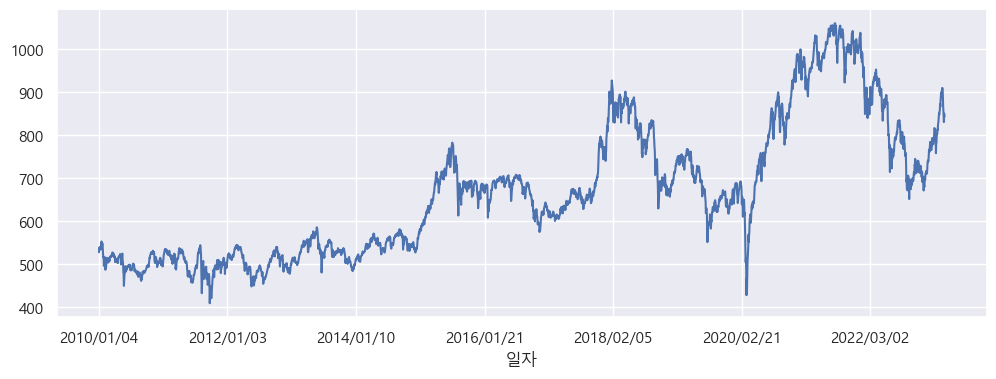

In [28]:
plt.rcParams["figure.figsize"] = (12, 4)
kosdaq['종가'].plot()
plt.show()

In [29]:
nasdaq1 = pd.read_csv('./nasdaq_data1.csv', thousands=',',date_parser=['날짜'])
nasdaq2 = pd.read_csv('./nasdaq_data2.csv', thousands=',',date_parser=['날짜'])
nasdaq = pd.concat([nasdaq1, nasdaq2], axis=0)
nasdaq = nasdaq[nasdaq['날짜']>='2009-01-01']  # 2010년 기준으로 변경
nasdaq = nasdaq.set_index('날짜')
print(nasdaq.info())
nasdaq = nasdaq.sort_index()
nasdaq

<class 'pandas.core.frame.DataFrame'>
Index: 3357 entries, 2018- 12- 31 to 2019- 01- 02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      3357 non-null   float64
 1   시가      3357 non-null   float64
 2   고가      3357 non-null   float64
 3   저가      3357 non-null   float64
 4   거래량     3357 non-null   object 
 5   변동 %    3357 non-null   object 
dtypes: float64(4), object(2)
memory usage: 183.6+ KB
None


종가      시가      고가      저가     거래량    변동 %
날짜                                                          
2010- 01- 04   46.23   46.13   46.29   46.08  62.82M   1.47%
2010- 01- 05   46.23   46.19   46.31   45.97  62.94M   0.00%
2010- 01- 06   45.95   46.20   46.36   45.88  96.03M  -0.61%
2010- 01- 07   45.98   46.01   46.08   45.73  77.09M   0.07%
2010- 01- 08   46.36   45.85   46.36   45.74  88.89M   0.83%
...              ...     ...     ...     ...     ...     ...
2023- 04- 27  320.35  315.70  320.86  315.05  62.64M   2.72%
2023- 04- 28  322.56  320.11  322.65  318.96  59.71M   0.69%
2023- 05- 01  322.19  322.09  323.63  321.09  40.30M  -0.11%
2023- 05- 02  319.38  322.12  322.45  317.61  55.70M  -0.87%
2023- 05- 03  317.29  319.75  322.47  317.18  58.00M  -0.65%

[3357 rows x 6 columns]

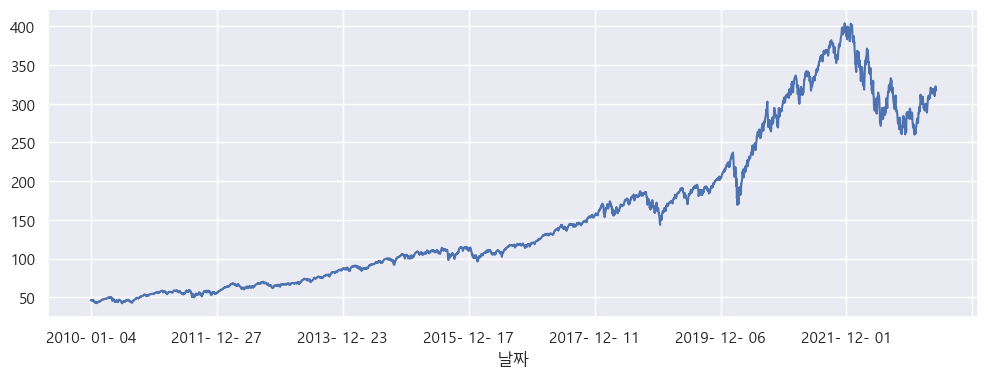

In [30]:
plt.rcParams["figure.figsize"] = (12, 4)
nasdaq['종가'].plot()
plt.show()

In [31]:
snp1 = pd.read_csv('./sp500_data1.csv', thousands=',',date_parser=['날짜'])
snp2 = pd.read_csv('./sp500_data2.csv', thousands=',',date_parser=['날짜'])
snp500 = pd.concat([snp1, snp2], axis=0)
snp500 = snp500[snp500['날짜']>='2009-01-01']  # 2010년 기준으로 변경
snp500 = snp500.set_index('날짜')
print(snp500.info())
snp500 = snp500.sort_index()

<class 'pandas.core.frame.DataFrame'>
Index: 3361 entries, 2018- 12- 31 to 2019- 01- 02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      3361 non-null   float64
 1   시가      3361 non-null   float64
 2   고가      3361 non-null   float64
 3   저가      3361 non-null   float64
 4   거래량     3356 non-null   object 
 5   변동 %    3361 non-null   object 
dtypes: float64(4), object(2)
memory usage: 183.8+ KB
None


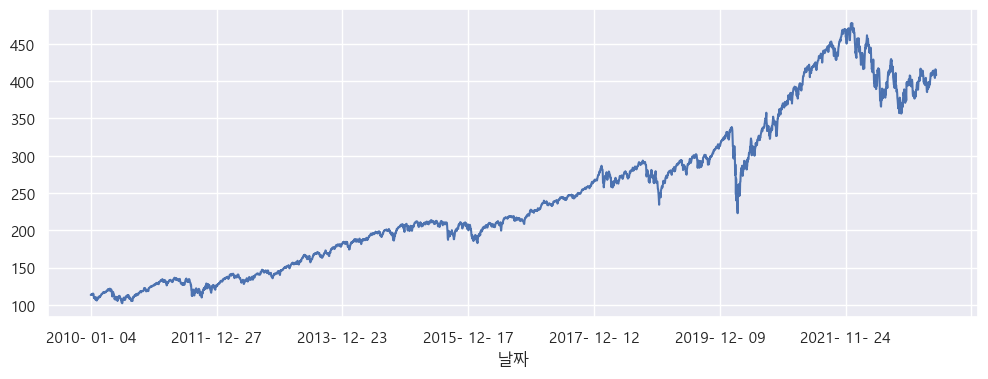

In [32]:
plt.rcParams["figure.figsize"] = (12, 4)
snp500['종가'].plot()
plt.show()

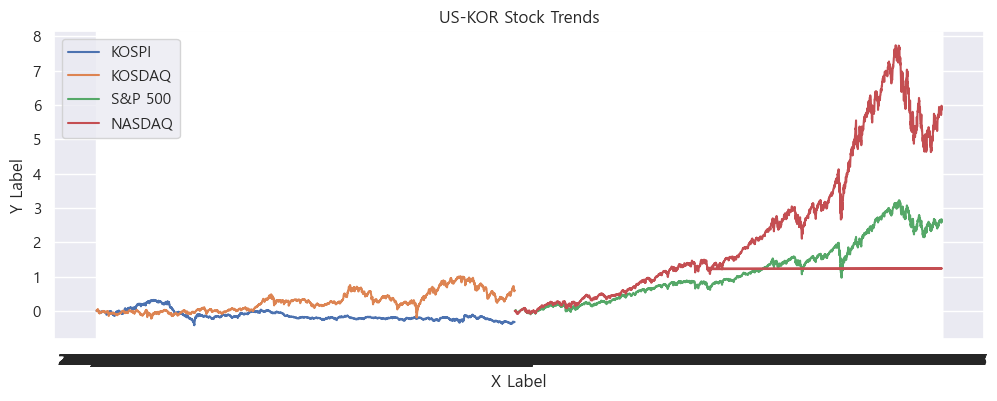

In [40]:
kospi["pct_chg"] = kospi["종가"].pct_change() 
kosdaq["pct_chg"] = kosdaq["종가"].pct_change() 
snp500["pct_chg"] = snp500["종가"].pct_change() 
nasdaq["pct_chg"] = nasdaq["종가"].pct_change() 

fig, ax = plt.subplots()

ax.plot(kospi.index, (1+kospi['pct_chg']).cumprod()-1, label='KOSPI')
ax.plot(kosdaq.index, (1+kosdaq['pct_chg']).cumprod()-1, label='KOSDAQ')
ax.plot(snp500.index, (1+snp500['pct_chg']).cumprod()-1, label='S&P 500')
ax.plot(nasdaq.index, (1+nasdaq['pct_chg']).cumprod()-1, label='NASDAQ')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('US-KOR Stock Trends')
ax.legend()
plt.show()